# Lecture 4: Data Preprocessing

MTU Spring 2026

Instructor: Amna Mazen

### Announcements
- Github repo for lecture code and dataset: https://github.com/MazenMTULab/EET-4501---Applied-Machine-Learning--Spring-2026/tree/main


### Imports

In [ ]:
import sys
import time

import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import HTML


from IPython.display import display
#from plotting_functions import *


# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

#from utils import *
from io import StringIO
import sys


pd.set_option("display.max_colwidth", 200)

## Motivation
- Are we ready to do machine learning on real-world datasets?
    - Very often real-world datasets need preprocessing before we use them to build ML models.

### Common preprocessing techniques

Some commonly performed feature transformation include:  
- Imputation: Tackling missing values
- Scaling: Scaling of numeric features
- One-hot encoding: Tackling categorical variables      
    

We can have one lecture on each of them! In this lecture our goal is to getting familiar with them so that we can use them to build ML pipelines.

## Handling missing values

In [ ]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# Replace consecutive commas with NaN
csv_data = csv_data.replace(',,', ',NaN,')

df = pd.read_csv(StringIO(csv_data))
print(df)


      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [ ]:
# Check for NaN values and summarize
nan_summary = df.isna().sum()

# Display summary
print("Summary of NaN values per column:")
print(nan_summary)


Summary of NaN values per column:
A    0
B    0
C    1
D    1
dtype: int64


In [ ]:
# remove rows that contain missing values
df.dropna(axis=0)


,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# remove columns that contain missing values

df.dropna(axis=1)


,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
# only drop rows where all columns are NaN
df.dropna(how='all')


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### Imputing missing values

In [ ]:
# Impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

imr=SimpleImputer(missing_values=np.nan, strategy='mean')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
# Fill NaN values with column means
df_filled = df.fillna(df.mean(numeric_only=True))

df_filled

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [ ]:
# Impute missing values via the column median

from sklearn.impute import SimpleImputer
import numpy as np

imr=SimpleImputer(missing_values=np.nan, strategy='median')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
# Fill NaN values with column median
df_filled = df.fillna(df.median(numeric_only=True))

df_filled

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [ ]:
# Impute missing values via a constant value
imr=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=100 )
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[  1.,   2.,   3.,   4.],
       [  5.,   6., 100.,   8.],
       [ 10.,  11.,  12., 100.]])

In [ ]:
# Impute missing values via a constant value
df_filled = df.fillna(100)

df_filled

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,100.0,8.0
2,10.0,11.0,12.0,100.0


## Handling categorical data

In [ ]:
import pandas as pd

df=pd.DataFrame([['green', 'M', 10.1, 'class2'],
                ['red', 'L', 13.5, 'class1'],
                ['blue', 'XL', 15.3, 'class2']])

df.columns=['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### Handling **Ordinal** categorical data

In [ ]:
#Mapping ordinal features (Manually)
size_mapping={'XL': 3,
             'L': 2,
             'M': 1}

df_manual=df
df_manual['size']=df_manual['size'].map(size_mapping)
df_manual

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
# Encoding ordinal features (using LabelEncoder)
from sklearn.preprocessing import LabelEncoder

## Label encoding with sklearn's LabelEncoder
df_automatic_labelEncoder=df
size_label=LabelEncoder()
df_automatic_labelEncoder['size']=size_label.fit_transform(df_automatic_labelEncoder['size'].values)
#print("Encoded class label: ",y)
#print("----")
print(df_automatic_labelEncoder)

   color  size  price classlabel
0  green     0   10.1     class2
1    red     1   13.5     class1
2   blue     2   15.3     class2


In [ ]:
# Encoding ordinal features (using LabelEncoder)
from sklearn.preprocessing import OrdinalEncoder

df_automatic_ordinalEncoder = df.copy()

size_label = OrdinalEncoder()

df_automatic_ordinalEncoder['size'] = size_label.fit_transform(
    df_automatic_ordinalEncoder[['size']])

print(df_automatic_ordinalEncoder)

   color  size  price classlabel
0  green   0.0   10.1     class2
1    red   1.0   13.5     class1
2   blue   2.0   15.3     class2


### Handling **Class** categorical data

In [ ]:
# Encoding class labels – label encoding (I)

## Create a mapping dict
## to convert class labels from string to integers
class_mapping={label:idx for idx, label in \
              enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
## mapping
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [ ]:
# Encoding class labels – label encoding (II)
from sklearn.preprocessing import LabelEncoder

## Label encoding with sklearn's LabelEncoder

class_label=LabelEncoder()
df['classlabel']=class_label.fit_transform(df['classlabel'].values)
#print("Encoded class label: ",y)
#print("----")
print(df)

   color  size  price  classlabel
0  green     0   10.1           1
1    red     1   13.5           0
2   blue     2   15.3           1


### Handling **Nominal** categorical data

In [ ]:
# Encoding on nominal features (size)
X=df[['color', 'size', 'price']].values
color_le=LabelEncoder()
X[:,1]=color_le.fit_transform(X[:,1])
X

array([['green', 0, 10.1],
       ['red', 1, 13.5],
       ['blue', 2, 15.3]], dtype=object)

In [ ]:
# Encoding on nominal features (color)
X[:,0]=color_le.fit_transform(X[:,0])
X

array([[1, 0, 10.1],
       [2, 1, 13.5],
       [0, 2, 15.3]], dtype=object)

In [ ]:
## Performing one-hot encoding on nominal features

from sklearn.preprocessing import OneHotEncoder

X=df[['color', 'size', 'price']].values
color_ohe=OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()



array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
## We can select which columns to encode in a multi-feature array

from sklearn.compose import ColumnTransformer

X=df[['color', 'size', 'price']].values
c_transf=ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                            ('nothing', 'passthrough', [1,2])
                           ])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  0. , 10.1],
       [ 0. ,  0. ,  1. ,  1. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

## Feature Scaling

### Bringing features onto the same scale

- Various different features can differ by orders of magnitude, where large values can domain smaller values.
- The majority of ML methods performs better if features are on the same scale.
- Common strategies to apply feature scaling:
    1. Normalization: rescaling feature to a range of [0, 1]
    2. Standardization: centering the feature columns at mean with standard deviation 1 so that it forms a standard normal distribution.


In [ ]:
## Normalization example

from sklearn.preprocessing import MinMaxScaler
import numpy as np

X=np.array([[1,2],[3,4],[12,8],[10,9],[15,2],[5,1]])

mms=MinMaxScaler()
X_norm=mms.fit_transform(X)

print("Before scaling:\n", X)
print("\n")
print("After scaling:\n", X_norm)

Before scaling:
 [[ 1  2]
 [ 3  4]
 [12  8]
 [10  9]
 [15  2]
 [ 5  1]]


After scaling:
 [[0.         0.125     ]
 [0.14285714 0.375     ]
 [0.78571429 0.875     ]
 [0.64285714 1.        ]
 [1.         0.125     ]
 [0.28571429 0.        ]]


In [ ]:
# Check standard deviation before standardization
np.std(X)

np.float64(4.4907311951024935)

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_std=stdsc.fit_transform(X)
print("Before standardization:\n", X)
print("\n")
print("After standardization:\n", X_std)

Before standardization:
 [[ 1  2]
 [ 3  4]
 [12  8]
 [10  9]
 [15  2]
 [ 5  1]]


After standardization:
 [[-1.32744662 -0.75482941]
 [-0.92921264 -0.10783277]
 [ 0.86284031  1.18616051]
 [ 0.46460632  1.50965882]
 [ 1.46019129 -0.75482941]
 [-0.53097865 -1.07832773]]


In [ ]:
# Check standard deviation after standardization
np.std(X_std)

np.float64(1.0)

## Feature Selection
- Select a subset of the original features.
- Scikit-learn provide a variate of different [feature selection methods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection).



In [ ]:
from sklearn.datasets import load_iris
data= load_iris(return_X_y=False)
df = pd.DataFrame(data=data.data, columns=data.feature_names)


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = load_iris(return_X_y=True)
print(X.shape)
print(X[0,:])

(150, 4)
[5.1 3.5 1.4 0.2]


In [ ]:
X_new=SelectKBest(chi2, k=2).fit_transform(X,y)
print(X_new.shape)
print(X_new[0,:])

(150, 2)
[1.4 0.2]


### Feature Importance sorting

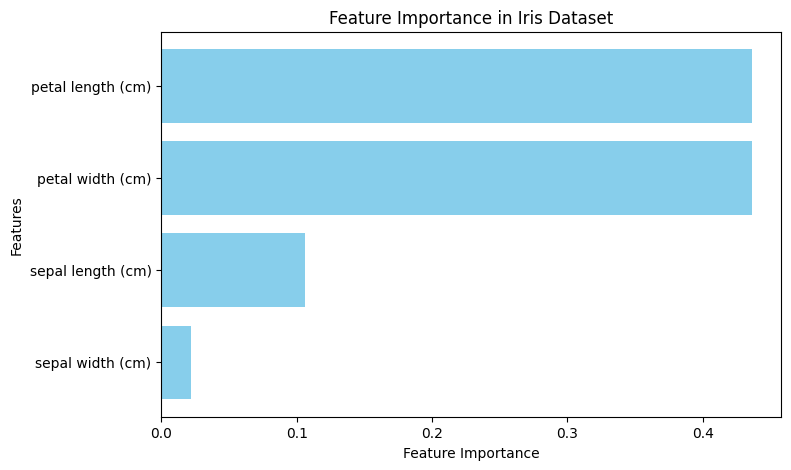

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances and sort them
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(np.array(iris.feature_names)[sorted_indices], feature_importances[sorted_indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Iris Dataset")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


### Correlation map

In [ ]:
!pip install seaborn

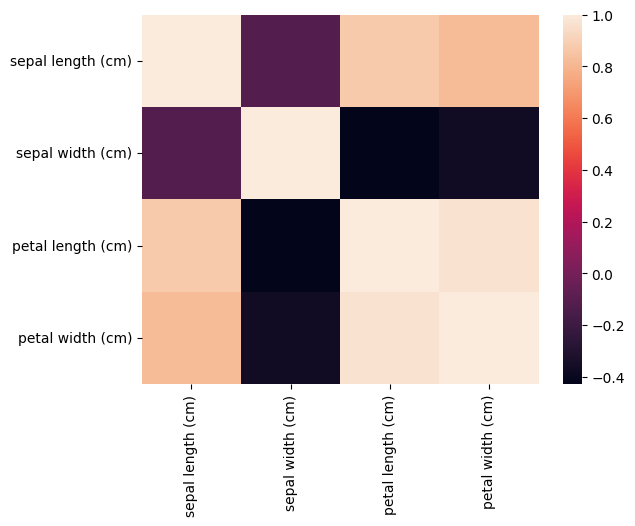

In [ ]:
import seaborn as sns

sns.heatmap(df.corr());


## Outlier Detection

IQR MethodIdentify points far from the median.

In [ ]:
# Step 1: Import necessary libraries.
import numpy as np
import seaborn as sns

# Sorting data in ascending order.
data = [6, 2, 3, 4, 5, 1, 50]
sort_data = np.sort(data)
sort_data

array([ 1,  2,  3,  4,  5,  6, 50])

In [ ]:
# Step 3: Calculating Q1, Q2, Q3 and IQR.
Q1 = np.percentile(data, 25, interpolation = 'midpoint')
Q2 = np.percentile(data, 50, interpolation = 'midpoint')
Q3 = np.percentile(data, 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  2.5
Q1 50 percentile of the given data is,  4.0
Q1 75 percentile of the given data is,  5.5
Interquartile range is 3.0


In [ ]:
# Step 4: Find the lower and upper limits.
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2.0
up_limit is 10.0


In [ ]:
# Step 5: Identify the outliers.
outlier =[]
for x in data:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [50]


<Axes: >

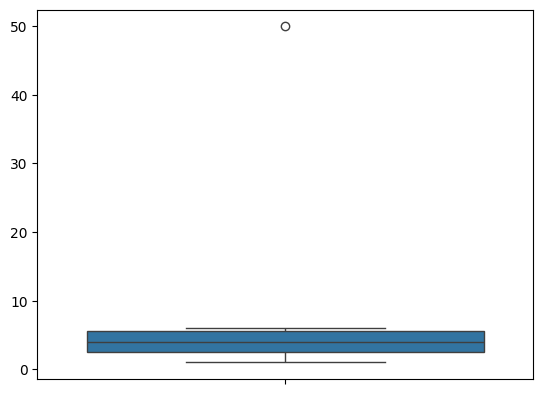

In [ ]:
# Step 6: Plot the box plot to highlight outliers.
sns.boxplot(data)